In [150]:
# Import required libraries
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split

In [151]:
# Define the CNN model
input_img = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)

In [152]:
# Define the FCN model
y = Dense(256, activation='relu')(x)
y = Dense(128, activation='relu')(y)
output = Dense(6, activation='linear')(y)

In [153]:
# Combine the CNN and FCN into a single model
model = Model(input_img, output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [154]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Load the image and RNA expression data
images = [image for image in os.listdir('data')]

In [155]:
# Load the image and RNA expression data
expression_data = pd.read_csv('df_train.csv')
expression_data['path'] = 'data/' + expression_data['path']
expression_data.head()

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
0,85.881503,72.668964,86.982548,71.567919,102.397177,56.153291,data/CoreID101.tif
1,84.038087,65.603926,85.122450,101.387886,100.845705,50.422852,data/CoreID102.tif
2,82.927907,70.431921,100.535887,130.071854,89.175900,52.823941,data/CoreID105.tif
3,93.960336,72.446053,92.204068,66.299116,74.202321,39.076962,data/CoreID107.tif
4,113.968536,73.458393,94.793735,49.152307,54.013524,28.627168,data/CoreID108.tif


In [156]:
# define the image data generator
datagen = ImageDataGenerator(rescale=1./255)

# split the data into train and validation sets
train_df, val_df = train_test_split(expression_data, test_size=0.2, random_state=42)

In [161]:
from sklearn.model_selection import train_test_split

# split the data into train and validation sets
train_df, val_df = train_test_split(expression_data, test_size=0.2, random_state=42)

# create the generators
train_gen = datagen.flow_from_dataframe(train_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=32)
val_gen = datagen.flow_from_dataframe(val_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=32)

history = model.fit_generator(train_gen, steps_per_epoch=3, epochs=100, validation_data=val_gen, validation_steps=3)

Found 79 validated image filenames.
Found 20 validated image filenames.
Epoch 1/100


C:\Users\sathy\AppData\Local\Temp\ipykernel_15900\2956420716.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, steps_per_epoch=3, epochs=100, validation_data=val_gen, validation_steps=3)


3/3 [==============================] - 1s 133ms/step - loss: 1055.2170 - accuracy: 0.2532 - val_loss: 567.1548 - val_accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - 0s 94ms/step - loss: 1060.4066 - accuracy: 0.3418
Epoch 3/100
3/3 [==============================] - 0s 77ms/step - loss: 1041.0940 - accuracy: 0.3797
Epoch 4/100
3/3 [==============================] - 0s 73ms/step - loss: 1019.1398 - accuracy: 0.3924
Epoch 5/100
3/3 [==============================] - 0s 70ms/step - loss: 1033.2649 - accuracy: 0.3418
Epoch 6/100
3/3 [==============================] - 0s 62ms/step - loss: 1012.8380 - accuracy: 0.2785
Epoch 7/100
3/3 [==============================] - 0s 70ms/step - loss: 1007.3878 - accuracy: 0.2532
Epoch 8/100
3/3 [==============================] - 0s 63ms/step - loss: 1010.1277 - accuracy: 0.2532
Epoch 9/100
3/3 [==============================] - 0s 70ms/step - loss: 999.3426 - accuracy: 0.2532
Epoch 10/100
3/3 [==============================] - 0s 70ms

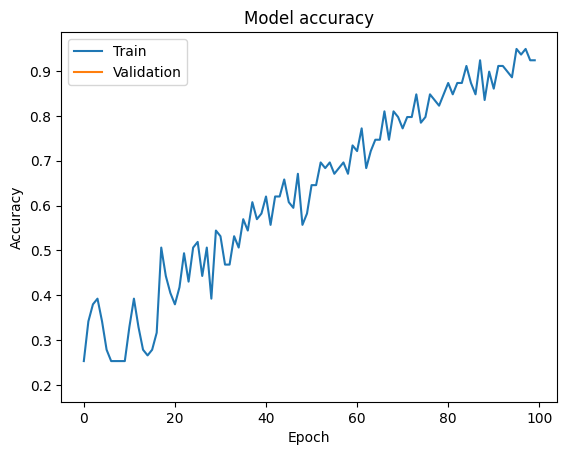

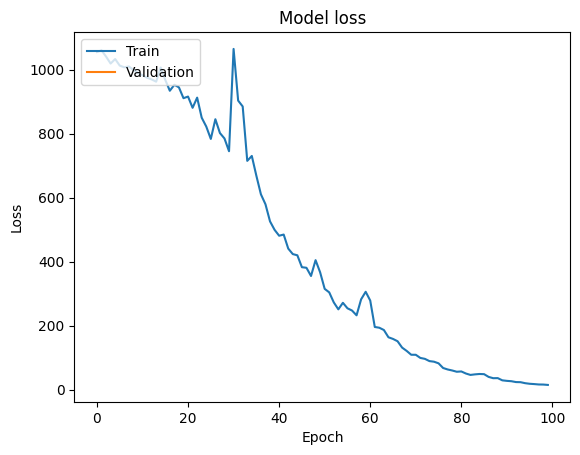

In [162]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()